In [ ]:
# HASHHHHHH EVERY STEP I AM TAKING

#  merging dataframe
# errors in unicode
# 

# Data Cleaning and EDA
- londonvenues csv undergoes EDA and cleaning in preparation for modelling

!!! USE OF TEST DATA !!!

In [4]:
import pandas as pd
import numpy as np
import pprint as pp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

## Categories

In [5]:
cat = pd.read_csv('./raw_data/category_tree.csv')
cat.head(3)

,level1_name,level1_id,level2_name,level2_id,level3_name,level3_id,level4_name,level4_id
0,Arts & Entertainment,4d4b7104d754a06370d81259,Amphitheaters,56aa371be4b08b9a8d5734db,NaN,NaN,NaN,NaN
1,Arts & Entertainment,4d4b7104d754a06370d81259,Aquariums,4fceea171983d5d06c3e9823,NaN,NaN,NaN,NaN
2,Arts & Entertainment,4d4b7104d754a06370d81259,Arcades,4bf58dd8d48988d1e1931735,NaN,NaN,NaN,NaN


In [6]:
# keep only necessary columns
categories = cat[['level1_name', 'level2_name']]
categories.columns = ['cat_parent', 'cat_name']
print categories.shape
categories.head()

(845, 2)


,cat_parent,cat_name
0,Arts & Entertainment,Amphitheaters
1,Arts & Entertainment,Aquariums
2,Arts & Entertainment,Arcades
3,Arts & Entertainment,Art Galleries
4,Arts & Entertainment,Bowling Alleys


## Encoding errors from category csv
- an error manipulating: UnicodeDecodeError: 'ascii' codec can't decode byte 0xe9 in position 3: ordinal not in range(128)
https://docs.python.org/3/howto/unicode.html#the-unicode-type 


In [74]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)


parent_cat_df = cat.groupby(['cat_parent']).count()
parent_cat_df

,cat_id,cat_name
cat_parent,,
Arts & Entertainment,61,61
Colleges & Universities,38,38
Events,9,9
Food,304,304
Nightlife Spots,24,24
Outdoors & Recreation,97,97
Professional & Other Places,92,92
Residences,5,5
Shops & Services,155,155


In [107]:
plt.figure()
parent_cat_df.iloc[0].plot(kind='bar')

In [115]:
import pandas as pd
 
# --- dataset 1: just 4 values for 4 groups:
# df = pd.DataFrame([8,8,1,2], index=['a', 'b', 'c', 'd'], columns=['x'])
 
# make the plot
# cat['cat_parent'].plot(kind='pie', figsize=(8, 8))
plt.pie(cat['cat_parent'])
plt.plot()

ValueError: could not convert string to float: Arts & Entertainment

In [242]:
categories.isnull().sum()

cat_parent     0
cat_name      10
dtype: int64

In [7]:
categories.ilocimport numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)


parent_cat_df = cat.groupby(['cat_parent']).count()
parent_cat_df

plt.figure()
parent_cat_df.iloc[0].plot(kind='bar')

import pandas as pd
 
# --- dataset 1: just 4 values for 4 groups:
# df = pd.DataFrame([8,8,1,2], index=['a', 'b', 'c', 'd'], columns=['x'])
 
# make the plot
# cat['cat_parent'].plot(kind='pie', figsize=(8, 8))
plt.pie(cat['cat_parent'])
plt.plot()[categories[categories.isnull().any(axis=1)].index,:]

,cat_parent,cat_name
61,Arts & Entertainment,NaN
100,Colleges & Universities,NaN
110,Events,NaN
415,Food,NaN
440,Nightlife Spots,NaN
538,Outdoors & Recreation,NaN
631,Professional & Other Places,NaN
637,Residences,NaN
793,Shops & Services,NaN
844,Travel & Transport,NaN


In [246]:
categories = categories.dropna()
categories.shape

(835, 2)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)


parent_cat_df = cat.groupby(['cat_parent']).count()
parent_cat_df

plt.figure()
parent_cat_df.iloc[0].plot(kind='bar')

import pandas as pd
 
# --- dataset 1: just 4 values for 4 groups:
# df = pd.DataFrame([8,8,1,2], index=['a', 'b', 'c', 'd'], columns=['x'])
 
# make the plot
# cat['cat_parent'].plot(kind='pie', figsize=(8, 8))
plt.pie(cat['cat_parent'])
plt.plot()

In [180]:
venues = pd.read_csv('./londonvenues.csv', encoding='utf-8')
venues.head(3)

,venue_name,venue_id,rating,tips,cat_name,cat_id,ll
0,Rish Mix,56b39c20498ea8fecd563d3d,NaN,NaN,Amphitheater,56aa371be4b08b9a8d5734db,"51.523882,-0.068887"
1,Garden Marquee,56e3505d498e40af95d08042,NaN,NaN,Amphitheater,56aa371be4b08b9a8d5734db,"51.526064,-0.13527"
2,Horniman Museum and Gardens,4ac518d2f964a52045a720e3,9.3,Great fun to be had by everyone. The aquarium ...,Aquarium,4fceea171983d5d06c3e9823,"51.4409815123,-0.0613689422607"


In [181]:
venues = venues.drop(['venue_name', 'venue_id', 'cat_id', 'll'], axis =1)
venues.head()

,rating,tips,cat_name
0,NaN,NaN,Amphitheater
1,NaN,NaN,Amphitheater
2,9.3,Great fun to be had by everyone. The aquarium ...,Aquarium
3,NaN,Love this place my new local shop,Aquarium
4,7.5,Enter our prize draw to win a family ticket to...,Aquarium


In [247]:
print venues.shape
print len(categories.cat_name.unique())
print len(categories.cat_parent.unique())

(8355, 3)
423
10


## Parent Categories to Venues DF
And drop uneccessary columns


In [273]:
# I think i have joined this incorrectly??? parent name shouldnt be NAN
dff = pd.merge(venues, categories, how='left', on=['cat_name'])
print dff.shape
dff.head(3)

(8685, 4)


,rating,tips,cat_name,cat_parent
0,NaN,NaN,Amphitheater,NaN
1,NaN,NaN,Amphitheater,NaN
2,9.3,Great fun to be had by everyone. The aquarium ...,Aquarium,NaN


In [274]:
dff.isnull().sum()

rating        4843
tips          3284
cat_name        12
cat_parent    8185
dtype: int64

## Save to CSV file
- cannot save until errors are solved.

In [186]:
# dff.to_csv('londonvenues_raw.csv', header=True, index=False)

## DataFrame Information

In [195]:
dff.head()

,rating,tips,cat_name,cat_parent
0,NaN,NaN,General Entertainment,Arts & Entertainment
1,7.2,Brilliant. So well thought out; even the stair...,General Entertainment,Arts & Entertainment
2,7.5,"Mid scale theatre, lots of short run productio...",General Entertainment,Arts & Entertainment
3,7.3,NaN,General Entertainment,Arts & Entertainment
4,6.7,Don't miss the flight sim - definitely worth t...,General Entertainment,Arts & Entertainment


In [219]:
print len(dff.cat_parent.unique())
print len(dff.cat_name.unique())
print dff.info()
print dff.shape

10
424
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1417 entries, 0 to 1416
Data columns (total 4 columns):
rating        188 non-null float64
tips          288 non-null object
cat_name      1297 non-null object
cat_parent    1417 non-null object
dtypes: float64(1), object(3)
memory usage: 95.4+ KB
None
(1417, 4)


## London Venues Dataset

Data Set Characteristics:  
    - Number of Instances: 3420 
    - Number of Attributes: 9 numeric/categorical predictive
    - Attribute Information (in order):

- venue_name : The best known name of the venue

- venue_id : Foursquare's unique I.D number

- rating : Average rating of the venue, range 0-10

- tips : User tips/reviews of the venue

- cat_name : The best relating category from Foursquare

- cat_id : Foursquare's unique category I.D

- ll : Longitude, Latitude of the location together (API search purposes)

- lng : Longitude

- lat : Latitude

## Null Values
- check null values
- if no rating or tip found ,.... very hard to undergo analysis? how to put into words?
- leaving the dataset with .....3420 entries

In [250]:
dff.isnull().sum()

rating        5640
tips          4081
cat_name        12
cat_parent    8185
dtype: int64

In [249]:
print len(dff.iloc[dff[dff.cat_name.isnull()].index,:])
N120 = dff.iloc[dff[dff.cat_name.isnull()].index,:]
N120.head()

12


,rating,tips,cat_name,cat_parent
838,NaN,NaN,NaN,NaN
839,NaN,NaN,NaN,NaN
840,NaN,Melody Create Music School photo2,NaN,NaN
841,NaN,NaN,NaN,NaN
842,NaN,NaN,NaN,NaN


In [202]:
dff.iloc[dff[dff.isnull().any(axis=1)].index,:].head()


,rating,tips,cat_name,cat_parent
0,NaN,NaN,General Entertainment,Arts & Entertainment
3,7.3,NaN,General Entertainment,Arts & Entertainment
7,NaN,Claim £30 Free - Deposit £10. Play with £40. A...,General Entertainment,Arts & Entertainment
8,NaN,NaN,General Entertainment,Arts & Entertainment
9,NaN,NaN,General Entertainment,Arts & Entertainment


In [10]:
df = venues.dropna(axis=0)
df.shape

(3420, 7)

In [11]:
df_drop = df.drop(['venue_id', 'venue_name', 'cat_id', 'll'], axis=1)
df_drop.head()

,rating,tips,cat_name
2,9.3,Great fun to be had by everyone. The aquarium ...,Aquarium
4,7.5,Enter our prize draw to win a family ticket to...,Aquarium
6,6.3,"If you're pressed for time, head to Hall 2 for...",Aquarium
8,7.7,Sea lion shows at 12pm and 3pm daily,Aquarium
9,8.4,"Great place for beer and video games, both arc...",Arcade


In [12]:
len(df_drop.cat_name.unique())

314

## Category and Rating 

In [175]:
df.describe()

,rating
count,3559.000000
mean,7.283816
std,1.197229
min,4.500000
25%,6.300000
50%,7.300000
75%,8.200000
max,9.700000


Ratings of the venues are generally high with the minimum value at 4.5 and maximum at 9.7.

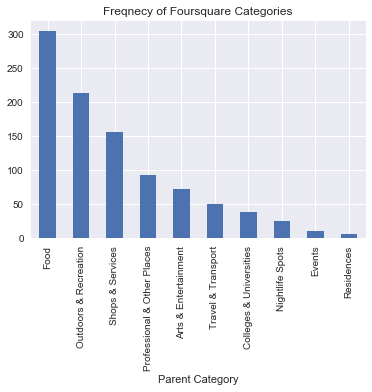

In [20]:
df_cat['cat_parent'].value_counts().plot(kind='bar')
plt.xlabel('Parent Category')
plt.title('Freqnecy of Foursquare Categories')
plt.show()

Majority of the ratings are food related

Histograms of frequency of subcategories in each category (side by side look up sns.FacetGrid)

In [ ]:
# df_cat.hist(by= 'cat_name', column = 'cat_parent')
# http://themrmax.github.io/2015/11/13/grouped-histograms-for-categorical-data-in-pandas.html 

In [49]:
# plt.scatter(df_cat["cat_parent"].encode('utf-8').strip(), df_cat["rating"])
# plt.show()

AttributeError: 'Series' object has no attribute 'encode'

In [46]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 0 to 970
Data columns (total 4 columns):
rating        159 non-null float64
tips          159 non-null object
cat_name      961 non-null object
cat_parent    971 non-null object
dtypes: float64(1), object(3)
memory usage: 77.9+ KB


### Save to csv cleaned

In [176]:
# cleaned to csv
df.to_csv('londonvenues_cleaned.csv', header=True, index=False, encoding='utf-8')

# encoding error utf8

UnicodeDecodeError: 'utf8' codec can't decode byte 0xe9 in position 2172: invalid continuation byte

# Relationship of tips and ratings

In [ ]:
import seaborn as sns
import matplotlib as plt

In [ ]:
g = sns.FacetGrid(data=df, col='rating')
g.map(plt.hist, 'text length', bins=50)

### EDA
- graphs plot histogram for categories 
- how many categories 
disribution with rating 
-.describe of ratings. analyse and annotatedescribe wht it is saying

### Statistcal Description 

In [ ]:
df.rating.describe()

The mean ratings of the venues are 7.24 with a standard deviation of 1.2 
descriptive statistics is used for the ratings describes
longitude latitude 

pair plot 

In [ ]:
pd.matrix()

# Preparation for modelling 

### Category names are dummified 

In [ ]:
len(df.cat_name.unique())

In [ ]:
cat_dummies = pd.get_dummies(df['cat_name'], drop_first=True)
cat_dummies.shape
# if i drop first how will i be able to identify that specific category ????